# Projet 5 - Segmentez les comportements de clients

### 1.Imports des librairies et configurations diverses

#### 1.1.Configuration de l'environnement

In [0]:
# !pip install --upgrade numpy

In [0]:
# !pip install --upgrade pandas

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### 1.2.Librairies

In [0]:
# Import the `pandas` library as `pd`
import pandas as pd
# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
# Import the `numpy` library as `np`
import numpy as np

import seaborn as sns

import os
import re
import datetime as dt

# Scikit-learn Packages
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import silhouette_samples, silhouette_score 
from sklearn.metrics import accuracy_score, confusion_matrix

from joblib import dump, load
from mpl_toolkits.mplot3d import Axes3D




#### 1.3.Contexte de mémoire

In [0]:
# cache directory for joblib objects
folder = "/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

### 2.Chargement des objets pour modélisation

In [0]:
data_filename_memmap = os.path.join(folder, 'X_memmap')
X = load(data_filename_memmap, mmap_mode='r')
data_filename_memmap = os.path.join(folder, 'X_train_memmap')
X_train = load(data_filename_memmap, mmap_mode='r')
data_filename_memmap = os.path.join(folder, 'X_test_memmap')
X_test = load(data_filename_memmap, mmap_mode='r')
data_filename_memmap = os.path.join(folder, 'X_test_new_memmap')
X_test_new = load(data_filename_memmap, mmap_mode='r')

data_filename_memmap = os.path.join(folder, 't0_memmap')
t_zero = load(data_filename_memmap, mmap_mode='r')

* X = jeu d'entrainement auquel on a appliqué les règles de création des features
* X_train = jeu d'entrainement issu du split
* X_test = jeu de test issu du split

* t_zero = t0 utilisé pour calcul de feature recency.

## Partie 1 - Classification des clients

### 3.Classification

#### 3.1.Standardisation

In [0]:
std_scale = StandardScaler().fit(X)
X_std = std_scale.transform(X)

In [0]:
X_std

array([[ 0.51606388,  0.25123908,  0.27347124, ...,  0.30236535,
         0.49372883, -0.1445012 ],
       [-0.10120219, -0.1882551 , -0.45948095, ..., -0.30000949,
        -0.55505284, -0.28665499],
       [-0.50497349, -0.07567847,  0.27347124, ..., -0.50883277,
        -0.0431475 ,  0.09199472],
       ...,
       [-0.58368907, -0.21301707, -0.45948095, ..., -0.73371937,
        -0.6674223 ,  0.39065683],
       [-0.60067804, -0.20191256, -0.31289051, ..., -0.78190936,
        -0.60499482,  0.31965275],
       [-0.47092475,  0.01979852,  1.73937561, ...,  1.19990385,
         2.51637917, -0.24152703]])

#### 3.2.Clustering

##### a.K-means
https://scikit-learn.org/stable/modules/clustering.html#k-means

For n_clusters = 2 The average silhouette_score is : 0.44765856508584567
For n_clusters = 3 The average silhouette_score is : 0.33956413485871667
For n_clusters = 4 The average silhouette_score is : 0.35133027675974143
For n_clusters = 5 The average silhouette_score is : 0.34985699537865717
For n_clusters = 6 The average silhouette_score is : 0.3563270948544889
For n_clusters = 7 The average silhouette_score is : 0.3694117495169208
For n_clusters = 8 The average silhouette_score is : 0.36979351501672597
For n_clusters = 9 The average silhouette_score is : 0.37210825012152193
For n_clusters = 10 The average silhouette_score is : 0.36699864660902765


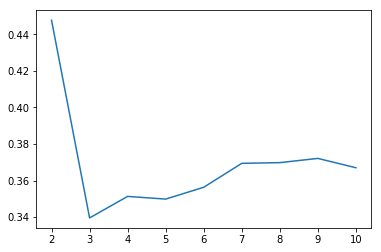

In [0]:
range_n_clusters = list(range(2,11))
result = {}

for n_clusters in range(2, 11):
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  clusterer.fit(X_std)
  cluster_labels = clusterer.predict(X_std)
  silhouette_avg = silhouette_score(X_std, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
#   result.append([n_clusters, silhouette_avg])
  result[n_clusters] = silhouette_avg

lists = sorted(result.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)  
plt.show()
  

For n_clusters = 2 The average silhouette_score is : 0.44765856508584567
For n_clusters = 3 The average silhouette_score is : 0.33956413485871667
For n_clusters = 4 The average silhouette_score is : 0.35133027675974143
For n_clusters = 5 The average silhouette_score is : 0.34985699537865717
For n_clusters = 6 The average silhouette_score is : 0.3563270948544889
For n_clusters = 7 The average silhouette_score is : 0.3694117495169208
For n_clusters = 8 The average silhouette_score is : 0.36979351501672597
For n_clusters = 9 The average silhouette_score is : 0.37210825012152193
For n_clusters = 10 The average silhouette_score is : 0.36699864660902765


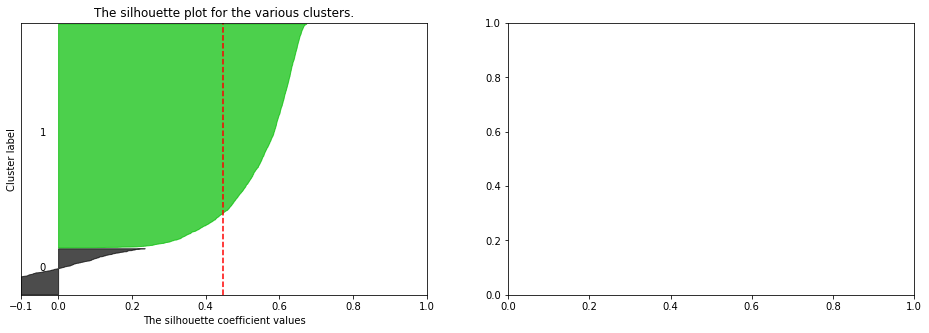

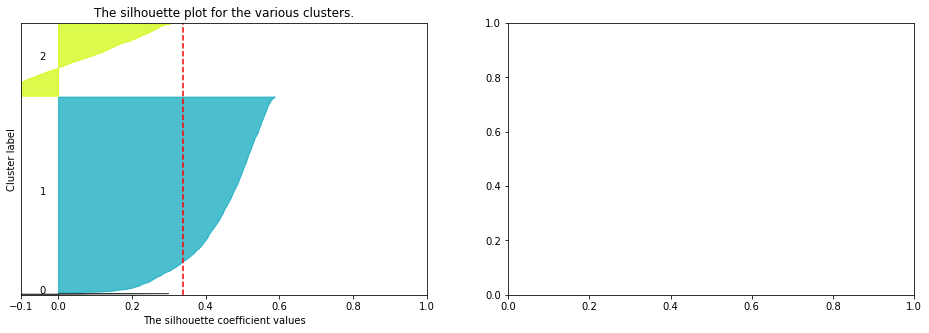

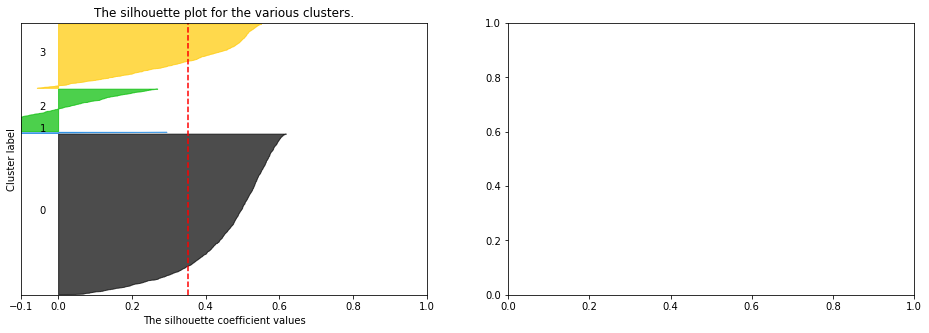

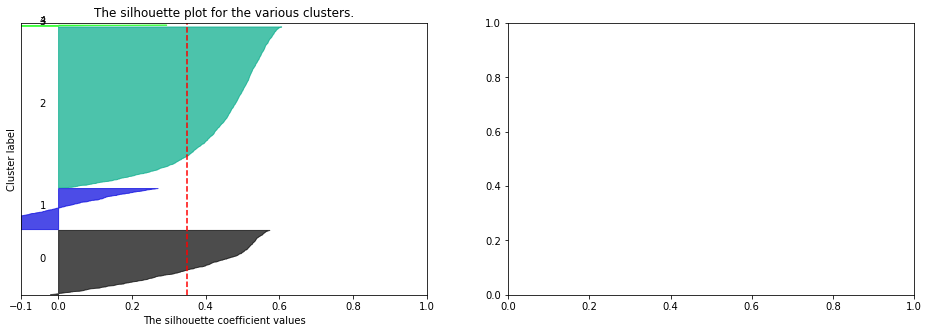

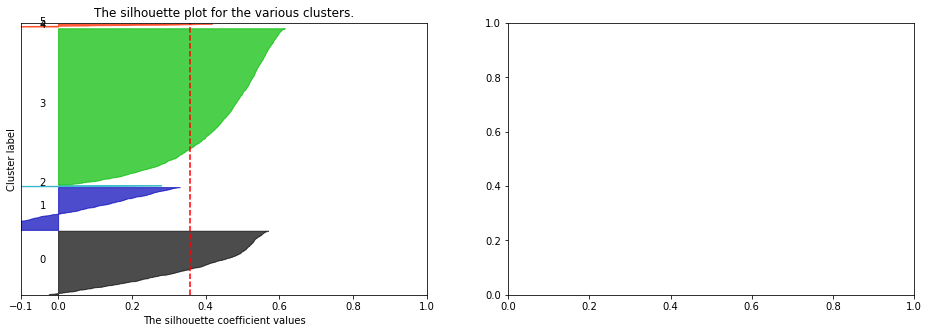

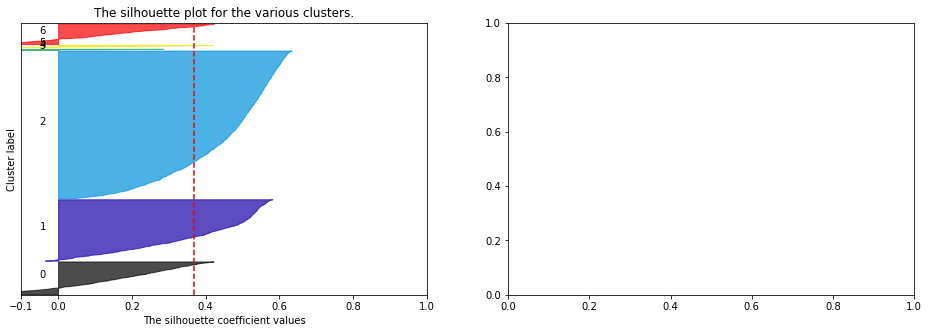

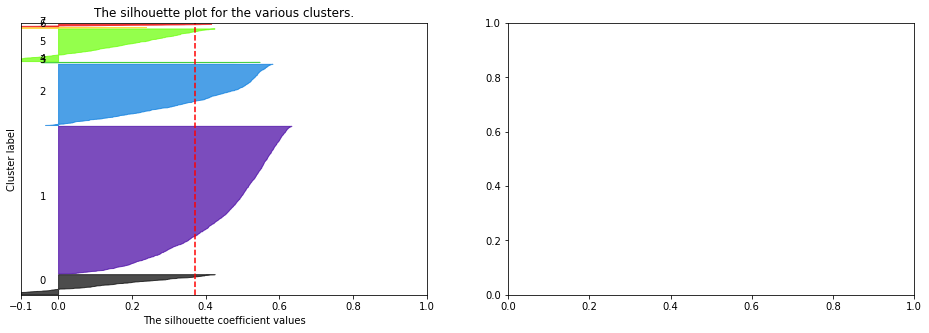

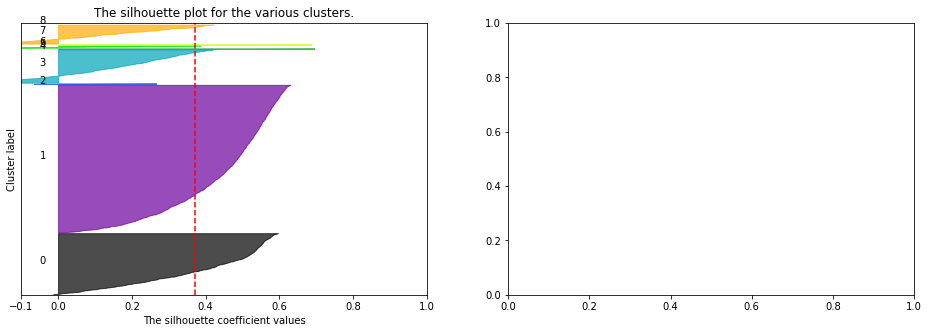

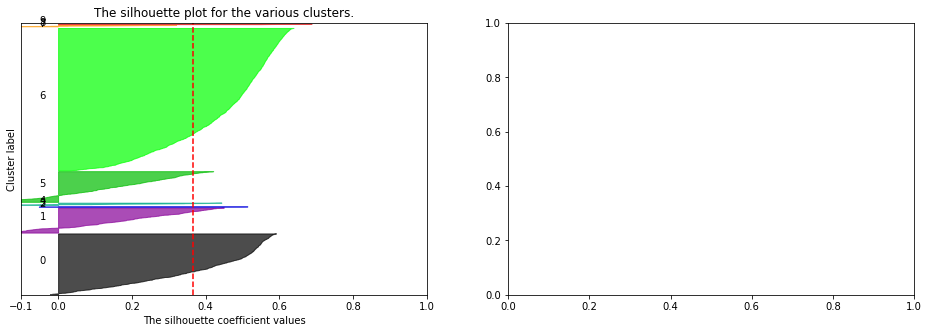

In [0]:
range_n_clusters = list(range(2,11))
# range_n_clusters = [2, 3, 4, 5, 6]

# fig = plt.figure(1)
n_rows = len(range_n_clusters)

for k in range (n_rows):
  n_clusters = range_n_clusters[k]

# for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
#   ax1 = fig.add_subplot(n_rows, 2, 2*k+1, figsize=(10, 5))
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1     
  ax1.set_xlim([-0.1, 1])    # à ajuster en fonction des résultats
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  clusterer.fit(X_std)
  cluster_labels = clusterer.predict(X_std)
#   cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
  silhouette_avg = silhouette_score(X_std, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_std, cluster_labels)
    
  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    
    
    
  # 2nd plot to represent the clusters
#   ax2 = fig.add_subplot(n_rows, 2, 2*(k+1), projection='3d')
#   ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#   ax2 = fig.add_subplot(122, projection='3d')
#   labels = clusterer.labels_



#   ax2.scatter(X['recency'], X['frequency'], X['monetary_value'],c=labels.astype(np.float), marker='o', cmap='hsv')

# #     ax2.w_xaxis.set_ticklabels([])
# #     ax2.w_yaxis.set_ticklabels([])
# #     ax2.w_zaxis.set_ticklabels([])
#   ax2.set_xlabel('R')
#   ax2.set_ylabel('F')
#   ax2.set_zlabel('M')
#   ax2.set_title('{} clusters'.format(n_clusters))
#   ax2.dist = 12

    
    
    
    
plt.show()
    

##### b.Interprétation des clusters

In [0]:
n_clusters = 6

In [0]:
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
clusterer.fit(X_std)
cluster_labels = clusterer.predict(X_std)

In [0]:
# Coordonnées des centroïdes
centroids = std_scale.inverse_transform(clusterer.cluster_centers_)

In [0]:
centroids

array([[1.45473249e+02, 4.60000597e+02, 1.57856273e+00, 2.48471376e+02,
        1.65573173e+01, 2.21522533e+01, 3.86746424e+00],
       [3.10877013e+02, 4.01605702e+03, 8.40107914e+00, 3.37643885e+01,
        4.78086056e+01, 1.69791367e+02, 2.69843910e+00],
       [1.25140834e+03, 1.04142969e+05, 6.65384615e+01, 8.46153846e+00,
        4.40436271e+01, 6.42000000e+02, 3.07230602e+00],
       [1.93276887e+02, 1.16383865e+03, 3.60474308e+00, 4.49584980e+01,
        1.67675668e+01, 4.18700593e+01, 3.10315018e+00],
       [1.00000000e+00, 5.90000000e+02, 2.00000000e+00, 2.57000000e+02,
        1.00000000e+00, 1.00000000e+00, 2.95000000e+02],
       [2.20666685e+03, 8.30357500e+03, 3.83333333e+00, 9.34444444e+01,
        5.59480880e+01, 8.19444444e+01, 1.90606769e+00]])

In [0]:
# df_categ = pd.DataFrame(centroids, columns = ['R', 'F', 'M'])
df_centroids = pd.DataFrame(centroids, columns = X.columns)

In [0]:
df_centroids

,mean_qty,monetary_value,nb_inv,recency,ref_mean,ref_tot,up_mean
0,145.473249,460.000597,1.578563,248.471376,16.557317,22.152253,3.867464
1,310.877013,4016.057016,8.401079,33.764388,47.808606,169.791367,2.698439
2,1251.408343,104142.969231,66.538462,8.461538,44.043627,642.000000,3.072306
3,193.276887,1163.838647,3.604743,44.958498,16.767567,41.870059,3.103150
4,1.000000,590.000000,2.000000,257.000000,1.000000,1.000000,295.000000
5,2206.666853,8303.575000,3.833333,93.444444,55.948088,81.944444,1.906068


In [0]:
# std_centr = StandardScaler().fit(df_categ)
# clust_std = std_centr.transform(df_categ)

# df = pd.DataFrame(clust_std, columns = df_categ.columns)

# nb_clust = len(df.index)
# print(nb_clust)

In [0]:
# df

In [0]:
seuils = [0, 0.25, 0.5, 0.75, 1]
echelles_max = [2000, 150000, 100, 300, 60, 1000, 200]
coef = [1/c for c in echelles_max]

In [0]:
coef_diag = np.diag(coef)

In [0]:
trace_centroids = np.matmul(centroids, coef_diag)

In [0]:
trace_centroids

array([[7.27366244e-02, 3.06667065e-03, 1.57856273e-02, 8.28237921e-01,
        2.75955289e-01, 2.21522533e-02, 1.93373212e-02],
       [1.55438507e-01, 2.67737134e-02, 8.40107914e-02, 1.12547962e-01,
        7.96810093e-01, 1.69791367e-01, 1.34921955e-02],
       [6.25704172e-01, 6.94286462e-01, 6.65384615e-01, 2.82051282e-02,
        7.34060452e-01, 6.42000000e-01, 1.53615301e-02],
       [9.66384433e-02, 7.75892431e-03, 3.60474308e-02, 1.49861660e-01,
        2.79459447e-01, 4.18700593e-02, 1.55157509e-02],
       [5.00000000e-04, 3.93333333e-03, 2.00000000e-02, 8.56666667e-01,
        1.66666667e-02, 1.00000000e-03, 1.47500000e+00],
       [1.10333343e+00, 5.53571667e-02, 3.83333333e-02, 3.11481481e-01,
        9.32468134e-01, 8.19444444e-02, 9.53033846e-03]])

In [0]:
echelles = np.matmul(np.transpose(np.matrix(seuils)), np.matrix(echelles_max))

In [0]:
echelles

matrix([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00],
        [5.000e+02, 3.750e+04, 2.500e+01, 7.500e+01, 1.500e+01,
         2.500e+02, 5.000e+01],
        [1.000e+03, 7.500e+04, 5.000e+01, 1.500e+02, 3.000e+01,
         5.000e+02, 1.000e+02],
        [1.500e+03, 1.125e+05, 7.500e+01, 2.250e+02, 4.500e+01,
         7.500e+02, 1.500e+02],
        [2.000e+03, 1.500e+05, 1.000e+02, 3.000e+02, 6.000e+01,
         1.000e+03, 2.000e+02]])

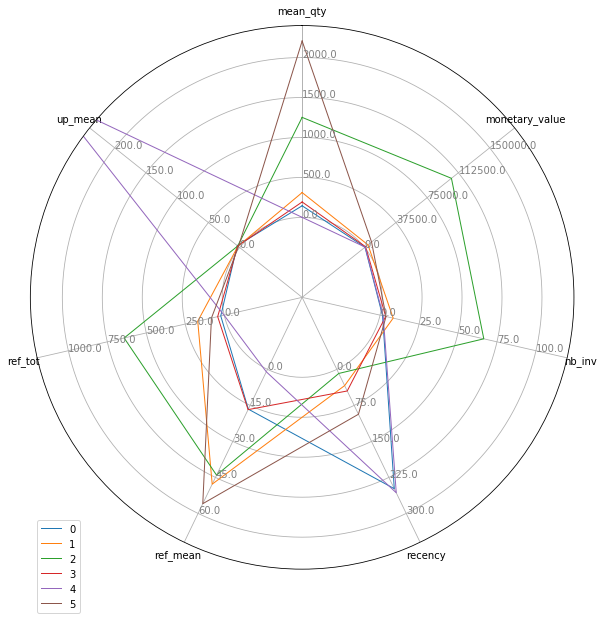

In [0]:

 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_centroids)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
# plt.xticks(angles[:-1], categories)
plt.xticks(angles[:], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(seuils, "" ,color="grey", size=10)

for i in range(0, N):
  for j in range(5):
    ax.text(angles[i], seuils[j], echelles[j,i], color="grey", size=10)

plt.ylim(-0.5,1.2)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

for k in range(n_clusters):
  values=trace_centroids[k].flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=df_centroids.index[k])

 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

Groupes de client:
* 0: peu de cdes, pttes qtés, ptts montants
* 1: idem en moyen
* 2: clients pros: bcp de cdes, de ref, de qtés, montant total élevé
* 3: peu de commandes, avec quantités et montant relativement élevés
* 4: petits clients perdus
* 5: clients perdus, mais qui avaient commandés des produits relativement chers

In [0]:
df_labels = pd.DataFrame(clusterer.labels_, columns = ['cluster'],index=X.index)

In [0]:
df_labels.head()

,cluster
CustomerID,
12347.0,3
12350.0,0
12352.0,3
12354.0,0
12356.0,3


#### 3.3.Application du modèle de classification

##### a.Jeu d'entrainement
On ajoute l'information du cluster au jeu de données d'entrainement initial.

In [0]:
#df_labels fait le lien entre un ID client et le cluster auquel il appartient

# X_train.head()
X_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
6,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom


In [0]:
X_train.shape

(303176, 8)

In [0]:
X_train_c = pd.DataFrame(X_train.apply(lambda row: df_labels.cluster[row['CustomerID']], axis=1), columns = ['cluster'])

In [0]:
X_train_labels = pd.concat([X_train, X_train_c], axis = 1)

In [0]:
X_train_labels.shape

(303176, 9)

In [0]:
X_train_labels.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


##### b.Jeu de test
On applique les règles de feature engineering et la classification au jeu de test.

In [0]:
X_feat = X_test.copy()

X_feat['TotalPrice'] = X_feat['Quantity'] * X_feat['UnitPrice']

list_ID = sorted(X_feat.CustomerID.unique())

resultat = pd.DataFrame()

for id in list_ID:
  df_ID = X_feat[X_feat['CustomerID'] == id]
  inv_count = len(df_ID.InvoiceNo.unique())
  tot_amount = df_ID.TotalPrice.sum()
  list_up = df_ID.drop_duplicates(['StockCode']).UnitPrice
  resultat = resultat.append({'CustomerID': id,
                              'nb_inv': inv_count,    #nb de cdes
                              'recency': (t_zero - df_ID.InvoiceDate.max()).days,    #délai avec dernière cde
                              'monetary_value': tot_amount,     # Montant Total des achats
                              'mean_qty': df_ID.Quantity.sum()/inv_count,   # moy de qté / cde
                              'ref_tot': len(df_ID.StockCode.unique()),     # nb de ref diff sur toutes les cdes du client
                              'ref_mean': len(df_ID.StockCode)/inv_count,    # moy du nb de ref / cde
                              'up_mean': list_up.mean()   # prix moyen d'un article
                             }, ignore_index=True)

resultat.set_index('CustomerID', inplace = True)

X = resultat.copy()

X_std = std_scale.transform(X)

cluster_labels = clusterer.predict(X_std)

df_labels = pd.DataFrame(cluster_labels , columns = ['cluster'],index=X.index)


df1_c = pd.DataFrame(X_test.apply(lambda row: df_labels.cluster[row['CustomerID']], axis=1), columns = ['cluster'])

X_test_labels = pd.concat([X_test, df1_c], axis = 1)

X_test_labels.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
26,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,3
27,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0,France,3
28,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,3
29,536370,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-01 08:45:00,1.65,12583.0,France,3
30,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-12-01 08:45:00,1.25,12583.0,France,3


In [0]:
X_feat = X_test_new.copy()

X_feat['TotalPrice'] = X_feat['Quantity'] * X_feat['UnitPrice']

list_ID = sorted(X_feat.CustomerID.unique())

resultat = pd.DataFrame()

for id in list_ID:
  df_ID = X_feat[X_feat['CustomerID'] == id]
  inv_count = len(df_ID.InvoiceNo.unique())
  tot_amount = df_ID.TotalPrice.sum()
  list_up = df_ID.drop_duplicates(['StockCode']).UnitPrice
  resultat = resultat.append({'CustomerID': id,
                              'nb_inv': inv_count,    #nb de cdes
                              'recency': (t_zero - df_ID.InvoiceDate.max()).days,    #délai avec dernière cde
                              'monetary_value': tot_amount,     # Montant Total des achats
                              'mean_qty': df_ID.Quantity.sum()/inv_count,   # moy de qté / cde
                              'ref_tot': len(df_ID.StockCode.unique()),     # nb de ref diff sur toutes les cdes du client
                              'ref_mean': len(df_ID.StockCode)/inv_count,    # moy du nb de ref / cde
                              'up_mean': list_up.mean()   # prix moyen d'un article
                             }, ignore_index=True)

resultat.set_index('CustomerID', inplace = True)

X = resultat.copy()

X_std = std_scale.transform(X)

cluster_labels = clusterer.predict(X_std)

df_labels = pd.DataFrame(cluster_labels , columns = ['cluster'],index=X.index)


df1_c = pd.DataFrame(X_test_new.apply(lambda row: df_labels.cluster[row['CustomerID']], axis=1), columns = ['cluster'])

X_test_new_labels = pd.concat([X_test_new, df1_c], axis = 1)

X_test_new_labels.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
388523,581000,21531,RED RETROSPOT SUGAR JAM BOWL,6,2011-12-07 08:03:00,2.55,12720.0,Germany,3
388524,581000,22072,RED RETROSPOT TEA CUP AND SAUCER,12,2011-12-07 08:03:00,1.25,12720.0,Germany,3
388525,581000,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2011-12-07 08:03:00,2.95,12720.0,Germany,3
388526,581000,22328,ROUND SNACK BOXES SET OF 4 FRUITS,6,2011-12-07 08:03:00,2.95,12720.0,Germany,3
388527,581000,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,2011-12-07 08:03:00,1.65,12720.0,Germany,3


In [0]:
# # Sauvegarde
# data_filename_memmap = os.path.join(folder, 'X_train_memmap')
# dump(X_train_labels, data_filename_memmap)

# data_filename_memmap = os.path.join(folder, 'X_test_memmap')
# dump(X_test_labels, data_filename_memmap)

In [0]:
# # Restauration
# data_filename_memmap = os.path.join(folder, 'X_train_memmap')
# X_train_labels = load(data_filename_memmap, mmap_mode='r')

# data_filename_memmap = os.path.join(folder, 'X_test_memmap')
# X_test_labels = load(data_filename_memmap, mmap_mode='r')

In [0]:

# df1 = X_test[X_test.groupby("CustomerID")["InvoiceDate"].transform('min') == X_test['InvoiceDate']]

## Partie 2 - Prédiction de la catégorie d'un nouveau client

### 1.Premier achat
On ne conserve que le premier achat de chaque client

In [0]:
X_train_l1 = X_train_labels[X_train_labels.groupby("CustomerID")["InvoiceDate"].transform('min') == X_train_labels['InvoiceDate']]

In [0]:
len(X_train_l1.CustomerID.unique())

3451

In [0]:
len(X_train_l1.InvoiceNo.unique())

3462

Il reste après opération 10 numéros de commande de plus que le nombre de clients. Or ces deux valeurs devraient être identiques, puisqu'on souhaite conserver une seule commande par client. 
Y aurait-il des clients pour lesquels plusieurs commandes ont la même date?

In [0]:
X_train_l1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
5,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
6,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
9,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,3
10,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,3
11,536367,21777,RECIPE BOX WITH METAL HEART,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom,3


En affichant simplement le dataset, on s'aperçoit par exemple qu'en effet le client 13047 a passé les commandes 536367 et 536368, avec l'horodatage "2010-12-01 08:34:00". Il n'est pas possible d'effectuer deux commandes sur un même site dans la même minute (avec plusieurs items sélectionnés à chaque fois). Il doit donc s'agir d'une unique commande, scindée par le vendeur. On va donc considérer le dataset en l'état.

### 2.Features

In [0]:
X_train_l1['TotalPrice'] = X_train_l1['Quantity'] * X_train_l1['UnitPrice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


On dresse la liste des ID client du jeu de données.

In [0]:
list_ID = sorted(X_train_l1.CustomerID.unique())

On créée l'ensemble des variables:

In [0]:
resultat = pd.DataFrame()
y_train = pd.DataFrame()

for id in list_ID:
  df_ID = X_train_l1[X_train_l1['CustomerID'] == id]
  invoice_value = df_ID.TotalPrice.sum()
  qty = df_ID.Quantity.sum()
  resultat = resultat.append({'CustomerID': id,
                              'monetary_value': invoice_value,     # Montant Total des achats
                              'quantity': qty,   # qté de la cde
                              'mean_price': invoice_value / qty,         # prix moyen par article
                              'references': len(df_ID.StockCode.unique())     # nb de ref differentes
                             }, ignore_index=True)
  y_train = y_train.append({'CustomerID': id,
                            'cluster': df_ID.cluster.unique()[0]
                            }, ignore_index=True)
  

In [0]:
resultat.set_index('CustomerID', inplace = True)
resultat.sort_index(inplace = True)
resultat.head()

,mean_price,monetary_value,quantity,references
CustomerID,,,,
12347.0,2.231317,711.79,319.0,31.0
12350.0,1.502041,294.40,196.0,16.0
12352.0,3.025510,296.50,98.0,15.0
12354.0,2.036604,1079.40,530.0,58.0
12356.0,1.625726,1947.62,1198.0,35.0


In [0]:
y_train.set_index('CustomerID', inplace = True)
y_train.sort_index(inplace = True)
y_train.head()

,cluster
CustomerID,
12347.0,3.0
12350.0,0.0
12352.0,3.0
12354.0,0.0
12356.0,3.0


In [0]:
X_feat_l = resultat.copy()

### 3.Standardisation

In [0]:
std_scale_2 = StandardScaler().fit(X_feat_l)
X_std_l = std_scale_2.transform(X_feat_l)

### 4.Mise en forme du jeu de test

In [0]:
X_test_l1 = X_test_labels[X_test_labels.groupby("CustomerID")["InvoiceDate"].transform('min') == X_test_labels['InvoiceDate']]

In [0]:
X_test_l2 = pd.DataFrame(X_test_l1.Quantity * X_test_l1.UnitPrice, columns = ['TotalPrice'])

In [0]:
X_test_l1 = pd.concat([X_test_l1,X_test_l2],axis=1, join='outer')

In [0]:
# X_test_l1['TotalPrice'] = X_test_l1.Quantity * X_test_l1.UnitPrice

list_ID = sorted(X_test_l1.CustomerID.unique())

resultat = pd.DataFrame()
y_test = pd.DataFrame()

for id in list_ID:
  df_ID = X_test_l1[X_test_l1['CustomerID'] == id]
  invoice_value = df_ID.TotalPrice.sum()
  qty = df_ID.Quantity.sum()
  resultat = resultat.append({'CustomerID': id,
                              'monetary_value': invoice_value,     # Montant Total des achats
                              'quantity': qty,   # qté de la cde
                              'mean_price': invoice_value / qty,         # prix moyen par article
                              'references': len(df_ID.StockCode.unique())     # nb de ref differentes
                             }, ignore_index=True)
  y_test = y_test.append({'CustomerID': id,
                            'cluster': df_ID.cluster.unique()[0]
                            }, ignore_index=True)

resultat.set_index('CustomerID', inplace = True)
resultat.sort_index(inplace = True)
X_test_l = resultat.copy()

In [0]:

X_test_std_l = std_scale_2.transform(X_test_l)

In [0]:
y_test.set_index('CustomerID', inplace = True)
y_test.sort_index(inplace = True)

second jeu de test pour mesure de performance avec biais sur horizon temporel

In [0]:
X_test_new_l1 = X_test_new_labels[X_test_new_labels.groupby("CustomerID")["InvoiceDate"].transform('min') == X_test_new_labels['InvoiceDate']]

In [0]:
X_test_new_l2 = pd.DataFrame(X_test_new_l1.Quantity * X_test_new_l1.UnitPrice, columns = ['TotalPrice'])

In [0]:
X_test_new_l1 = pd.concat([X_test_new_l1,X_test_new_l2],axis=1, join='outer')

In [0]:
# X_test_new_l1['TotalPrice'] = X_test_new_l1.Quantity * X_test_new_l1.UnitPrice

list_ID = sorted(X_test_new_l1.CustomerID.unique())

resultat = pd.DataFrame()
y_test_new = pd.DataFrame()

for id in list_ID:
  df_ID = X_test_new_l1[X_test_new_l1['CustomerID'] == id]
  invoice_value = df_ID.TotalPrice.sum()
  qty = df_ID.Quantity.sum()
  resultat = resultat.append({'CustomerID': id,
                              'monetary_value': invoice_value,     # Montant Total des achats
                              'quantity': qty,   # qté de la cde
                              'mean_price': invoice_value / qty,         # prix moyen par article
                              'references': len(df_ID.StockCode.unique())     # nb de ref differentes
                             }, ignore_index=True)
  y_test_new = y_test_new.append({'CustomerID': id,
                            'cluster': df_ID.cluster.unique()[0]
                            }, ignore_index=True)

resultat.set_index('CustomerID', inplace = True)
resultat.sort_index(inplace = True)
X_test_new_l = resultat.copy()

In [0]:

X_test_new_std_l = std_scale_2.transform(X_test_new_l)

In [0]:
y_test_new.set_index('CustomerID', inplace = True)
y_test_new.sort_index(inplace = True)

In [0]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'X_train_std')
dump(X_std_l, data_filename_memmap)
data_filename_memmap = os.path.join(folder, 'y_train')
dump(y_train, data_filename_memmap)

data_filename_memmap = os.path.join(folder, 'X_test_std')
dump(X_test_std_l, data_filename_memmap)
data_filename_memmap = os.path.join(folder, 'y_test')
dump(y_test, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/y_test']

In [0]:
# Restauration
data_filename_memmap = os.path.join(folder, 'X_train_std')
X_std_l = load(data_filename_memmap, mmap_mode='r')
data_filename_memmap = os.path.join(folder, 'y_train')
y_train = load(data_filename_memmap, mmap_mode='r')

data_filename_memmap = os.path.join(folder, 'X_test_std')
X_test_std_l = load(data_filename_memmap, mmap_mode='r')
data_filename_memmap = os.path.join(folder, 'y_test')
y_test = load(data_filename_memmap, mmap_mode='r')

### 5.Classification

#### a.Dummy classifier
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier

In [0]:
y_train_s = y_train.cluster
y_test_s = y_test.cluster

In [0]:

y_test_new_s = y_test_new.cluster

In [0]:
clf_dum = DummyClassifier()
clf_dum.fit(X_std_l, y_train_s)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [0]:
clf_dum.score(X_std_l, y_train_s)

0.4332077658649667

In [0]:
clf_dum.score(X_test_std_l, y_test_s)

0.41367323290845887

In [0]:
clf_dum.score(X_test_new_std_l, y_test_new_s)

0.5442477876106194

In [0]:
pred_dummy = clf_dum.predict(X_test_std_l)

print("Test Accuracy with dummy : ", accuracy_score(y_test_s, pred_dummy))

Test Accuracy with dummy :  0.41135573580533025


In [0]:
pred_dummy_new = clf_dum.predict(X_test_new_std_l)

print("Test Accuracy with dummy (new): ", accuracy_score(y_test_new_s, pred_dummy_new))

Test Accuracy with dummy (new):  0.5398230088495575


In [0]:
X_test_std_l

memmap([[-0.23683281,  0.53790272,  2.98813812, -0.50112273],
        [-0.0246334 ,  2.17054673,  1.16143859,  2.26307548],
        [ 0.22856419, -0.60591175, -0.64161433, -0.86968249],
        ...,
        [ 0.01344256, -0.43367009, -0.50564641, -0.63933264],
        [ 0.17681289, -0.4200774 , -0.56771872, -0.59326267],
        [-0.11297105,  0.76609756,  0.74171152,  0.18992682]])

#### b.Random Forest

In [0]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_std_l, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
print("Trained model :{}".format(clf_rf))

Trained model :RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [0]:
pred_rf = clf_rf.predict(X_test_std_l)

In [0]:
pred_rf_new = clf_rf.predict(X_test_new_std_l)

In [0]:
# Train and Test Accuracy
print("Train Accuracy : ", accuracy_score(y_train, clf_rf.predict(X_std_l)))
print("Test Accuracy  : ", accuracy_score(y_test, pred_rf))
print("Test Accuracy (new) : ", accuracy_score(y_test_new, pred_rf_new))

Train Accuracy :  0.9762387713706172
Test Accuracy  :  0.5701042873696408
Test Accuracy (new) :  0.7610619469026548


In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.



In [0]:
print(" Confusion matrix:\n", confusion_matrix(y_test, pred_rf))

 Confusion matrix:
 [[ 48  19   0 139   0]
 [ 17  76   0  53   3]
 [  0   1   0   2   0]
 [ 96  38   0 365   1]
 [  0   1   0   1   3]]


In [0]:
y_test.cluster.unique()

array([3., 1., 0., 5., 2.])

In [0]:
print(" Confusion matrix:\n", confusion_matrix(y_train, clf_rf.predict(X_std_l)))

 Confusion matrix:
 [[ 792    2    0   27    0    0]
 [   7  538    0   10    0    0]
 [   0    0   11    0    0    2]
 [  18   13    0 1994    0    0]
 [   0    0    0    1    0    0]
 [   0    0    0    2    0   34]]


In [0]:
cm = pd.DataFrame(confusion_matrix(y_train, clf_rf.predict(X_std_l)))

In [0]:
cm

,0,1,2,3,4,5
0,792,2,0,27,0,0
1,7,538,0,10,0,0
2,0,0,11,0,0,2
3,18,13,0,1994,0,0
4,0,0,0,1,0,0
5,0,0,0,2,0,34


#### c.SVM

In [0]:
clf_svm = SVC(kernel='linear', C=1)

In [0]:
clf_svm.fit(X_std_l, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
pred_svm = clf_svm.predict(X_test_std_l)

In [0]:
# Train and Test Accuracy
print("Train Accuracy -SVM : ", accuracy_score(y_train, clf_svm.predict(X_std_l)))
print("Test Accuracy  -SVM : ", accuracy_score(y_test, pred_svm))

Train Accuracy -SVM :  0.6493769921761808
Test Accuracy  -SVM :  0.641946697566628


In [0]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, C=C))

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


for clf, title in zip(models, titles):
  clf.fit(X_std_l, y_train)
  print("Acuracy with {} : {}".format(title, accuracy_score(y_test, clf.predict(X_test_std_l))))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acuracy with SVC with linear kernel : 0.641946697566628


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acuracy with LinearSVC (linear kernel) : 0.6442641946697567
Acuracy with SVC with RBF kernel : 0.6431054461181923


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acuracy with SVC with polynomial (degree 3) kernel : 0.6431054461181923


https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

In [0]:
Cs = [0.001, 0.01, 0.1, 1, 2, 5, 10]
gammas = [0.00001, 0.001, 0.001, 0.01, 0.1, 1]
kernels = ('linear', 'rbf')
param_grid = {'kernel': kernels, 'C': Cs, 'gamma' : gammas}

In [0]:
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

In [0]:
# y_train.cluster.values

In [0]:
grid_search.fit(X_std_l, y_train.cluster.values)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1, 2, 5, 10], 'gamma': [1e-05, 0.001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
grid_search.best_params_

{'C': 0.1, 'gamma': 1e-05, 'kernel': 'linear'}

In [0]:
clf_svm = SVC(kernel='linear', C=1)

In [0]:
clf_svm.fit(X_std_l, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
pred_svm = clf_svm.predict(X_test_std_l)

In [0]:
print("Test Accuracy  -SVM : ", accuracy_score(y_test, pred_svm))

Test Accuracy  -SVM :  0.641946697566628


Mesure de la performance avec le dataset de test biaisé:

In [0]:
pred_svm_new = clf_svm.predict(X_test_new_std_l)
print("Test Accuracy  -SVM (new): ", accuracy_score(y_test_new, pred_svm_new))

Test Accuracy  -SVM (new):  0.9557522123893806


L'accuracy de 95% s'explique par le biais créé lors de la mise de côté des données: En fixant un horizon temporel proche de la fin de la période des données, on a restreint le nombre d'achats pour chaque client. La segmentation est donc réalisée sur un seul achat, tout comme la classification. Il est donc logique que la classification donne un résultat extrêment proche.

Sauvegarde du modèle entrainé pour le programme.

In [0]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'modele')
dump(clf_svm, data_filename_memmap)
data_filename_memmap = os.path.join(folder, 'scaler')
dump(std_scale_2, data_filename_memmap)


['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/scaler']

### 6.Comparaison avec les deux premiers achats

In [0]:
X_train_l2 = X_train_labels.copy()

In [0]:
X_train_l2['TotalPrice'] = X_train_l2['Quantity'] * X_train_l2['UnitPrice']

In [0]:
list_ID = sorted(X_train_l2.CustomerID.unique())

In [0]:
resultat = pd.DataFrame()
y_train = pd.DataFrame()

for id in list_ID:
  df_ID = X_train_l2[X_train_l2['CustomerID'] == id]
  # on conserve les deux premières factures
  list_inv = df_ID.InvoiceDate.unique()[:2]
  df_inv = df_ID[df_ID['InvoiceDate'].isin(list_inv)]
  
  inv_count = len(df_inv.InvoiceNo.unique())
  
  tot_amount = df_inv.TotalPrice.sum()
  list_up = df_ID.drop_duplicates(['StockCode']).UnitPrice
  qty = df_inv.Quantity.sum()
  resultat = resultat.append({'CustomerID': id,
                              'nb_inv': inv_count,    #nb de cdes
                              'recency': (t_zero - df_inv.InvoiceDate.max()).days,    #délai avec dernière cde
                              'monetary_value': tot_amount,     # Montant Total des achats
                              'mean_qty': df_inv.Quantity.sum()/inv_count,   # moy de qté / cde
                              'mean_value': tot_amount / inv_count,         # moy de montant / cde
                              'ref_tot': len(df_inv.StockCode.unique()),     # nb de ref diff sur toutes les cdes du client
                              'ref_mean': len(df_inv.StockCode)/inv_count,    # moy du nb de ref / cde
                              'up_mean': list_up.mean()   # prix moyen d'un article
                             }, ignore_index=True)
  
  y_train = y_train.append({'CustomerID': id,
                            'cluster': df_inv.cluster.unique()[0]
                            }, ignore_index=True)
  

In [0]:
resultat.set_index('CustomerID', inplace = True)
resultat.sort_index(inplace = True)
resultat.head()

,mean_qty,mean_value,monetary_value,nb_inv,recency,ref_mean,ref_tot,up_mean
CustomerID,,,,,,,,
12347.0,317.0,593.590,1187.18,2.0,315.0,30.0,49.0,2.429500
12350.0,196.0,294.400,294.40,1.0,308.0,16.0,16.0,1.581250
12352.0,61.5,200.425,400.85,2.0,281.0,9.5,18.0,3.840702
12354.0,530.0,1079.400,1079.40,1.0,230.0,58.0,58.0,4.503793
12356.0,784.0,1214.540,2429.08,2.0,243.0,28.0,52.0,2.339808


In [0]:
y_train.set_index('CustomerID', inplace = True)
y_train.sort_index(inplace = True)
y_train.head()

,cluster
CustomerID,
12347.0,3.0
12350.0,0.0
12352.0,3.0
12354.0,0.0
12356.0,3.0


In [0]:
X_feat_l = resultat.copy()

In [0]:
#standardisation
std_scale_2 = StandardScaler().fit(X_feat_l)
X_std_l = std_scale_2.transform(X_feat_l)

In [0]:
# Application au jeu de test

In [0]:
X_test_l2 = X_test_labels.copy()

In [0]:
X_test_l2['TotalPrice'] = X_test_l2['Quantity'] * X_test_l2['UnitPrice']

In [0]:
list_ID = sorted(X_test_l2.CustomerID.unique())

In [0]:
resultat = pd.DataFrame()
y_test_l2 = pd.DataFrame()

for id in list_ID:
  df_ID = X_test_l2[X_test_l2['CustomerID'] == id]
  # on conserve les deux premières factures
  list_inv = df_ID.InvoiceDate.unique()[:2]
  df_inv = df_ID[df_ID['InvoiceDate'].isin(list_inv)]
  
  inv_count = len(df_inv.InvoiceNo.unique())
  
  tot_amount = df_inv.TotalPrice.sum()
  list_up = df_ID.drop_duplicates(['StockCode']).UnitPrice
  qty = df_inv.Quantity.sum()
  resultat = resultat.append({'CustomerID': id,
                              'nb_inv': inv_count,    #nb de cdes
                              'recency': (t_zero - df_inv.InvoiceDate.max()).days,    #délai avec dernière cde
                              'monetary_value': tot_amount,     # Montant Total des achats
                              'mean_qty': df_inv.Quantity.sum()/inv_count,   # moy de qté / cde
                              'mean_value': tot_amount / inv_count,         # moy de montant / cde
                              'ref_tot': len(df_inv.StockCode.unique()),     # nb de ref diff sur toutes les cdes du client
                              'ref_mean': len(df_inv.StockCode)/inv_count,    # moy du nb de ref / cde
                              'up_mean': list_up.mean()   # prix moyen d'un article
                             }, ignore_index=True)
  
  y_test_l2 = y_test_l2.append({'CustomerID': id,
                            'cluster': df_inv.cluster.unique()[0]
                            }, ignore_index=True)

In [0]:
resultat.set_index('CustomerID', inplace = True)
resultat.sort_index(inplace = True)
resultat.head()

,mean_qty,mean_value,monetary_value,nb_inv,recency,ref_mean,ref_tot,up_mean
CustomerID,,,,,,,,
12348.0,924.0,420.12,840.24,2.0,316.0,10.5,17.0,0.691905
12349.0,630.0,1457.55,1457.55,1.0,16.0,72.0,72.0,4.237500
12353.0,20.0,89.00,89.00,1.0,202.0,4.0,4.0,6.075000
12355.0,240.0,459.40,459.40,1.0,212.0,13.0,13.0,4.203846
12363.0,204.0,276.00,552.00,2.0,107.0,11.5,23.0,2.311739


In [0]:
y_test_l2.set_index('CustomerID', inplace = True)
y_test_l2.sort_index(inplace = True)
y_test_l2.head()

,cluster
CustomerID,
12348.0,3.0
12349.0,1.0
12353.0,0.0
12355.0,0.0
12363.0,3.0


In [0]:
X_test_l2 = resultat.copy()

In [0]:
#standardisation
X_test_std_l2 = std_scale_2.transform(X_test_l2)

In [0]:
# Classification

In [0]:
Cs = [0.001, 0.01, 0.1, 1, 2, 5, 10]
gammas = [0.00001, 0.001, 0.001, 0.01, 0.1, 1]
kernels = ('linear', 'rbf')
param_grid = {'kernel': kernels, 'C': Cs, 'gamma' : gammas}

In [0]:
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

In [0]:
grid_search.fit(X_std_l, y_train.cluster.values)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1, 2, 5, 10], 'gamma': [1e-05, 0.001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [0]:
clf_svm = SVC(kernel='linear', C=1)

In [0]:
clf_svm.fit(X_std_l, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
pred_svm_l2 = clf_svm.predict(X_test_std_l2)

In [0]:
print("Test Accuracy  -SVM : ", accuracy_score(y_test_l2, pred_svm_l2))

Test Accuracy  -SVM :  0.8400926998841252
